In [148]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [149]:
df = pd.read_csv('ipl.csv')

In [150]:
df.head()

,mid,date,venue,bat_team,bowl_team,batsman,bowler,runs,wickets,overs,runs_last_5,wickets_last_5,striker,non-striker,total
0,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,SC Ganguly,P Kumar,1,0,0.1,1,0,0,0,222
1,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,1,0,0.2,1,0,0,0,222
2,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.2,2,0,0,0,222
3,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.3,2,0,0,0,222
4,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.4,2,0,0,0,222


### Exploring Dataset

In [151]:
df.shape

(76014, 15)

In [152]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76014 entries, 0 to 76013
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   mid             76014 non-null  int64  
 1   date            76014 non-null  object 
 2   venue           76014 non-null  object 
 3   bat_team        76014 non-null  object 
 4   bowl_team       76014 non-null  object 
 5   batsman         76014 non-null  object 
 6   bowler          76014 non-null  object 
 7   runs            76014 non-null  int64  
 8   wickets         76014 non-null  int64  
 9   overs           76014 non-null  float64
 10  runs_last_5     76014 non-null  int64  
 11  wickets_last_5  76014 non-null  int64  
 12  striker         76014 non-null  int64  
 13  non-striker     76014 non-null  int64  
 14  total           76014 non-null  int64  
dtypes: float64(1), int64(8), object(6)
memory usage: 8.7+ MB


In [153]:
df.dtypes

mid                 int64
date               object
venue              object
bat_team           object
bowl_team          object
batsman            object
bowler             object
runs                int64
wickets             int64
overs             float64
runs_last_5         int64
wickets_last_5      int64
striker             int64
non-striker         int64
total               int64
dtype: object

In [154]:
df.columns

Index(['mid', 'date', 'venue', 'bat_team', 'bowl_team', 'batsman', 'bowler',
       'runs', 'wickets', 'overs', 'runs_last_5', 'wickets_last_5', 'striker',
       'non-striker', 'total'],
      dtype='object')

In [155]:
df.isnull().sum()

mid               0
date              0
venue             0
bat_team          0
bowl_team         0
batsman           0
bowler            0
runs              0
wickets           0
overs             0
runs_last_5       0
wickets_last_5    0
striker           0
non-striker       0
total             0
dtype: int64

In [156]:
df.head()

,mid,date,venue,bat_team,bowl_team,batsman,bowler,runs,wickets,overs,runs_last_5,wickets_last_5,striker,non-striker,total
0,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,SC Ganguly,P Kumar,1,0,0.1,1,0,0,0,222
1,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,1,0,0.2,1,0,0,0,222
2,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.2,2,0,0,0,222
3,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.3,2,0,0,0,222
4,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.4,2,0,0,0,222


### Data Visulaization

In [157]:
df['bat_team'].value_counts()

Mumbai Indians                 10213
Kings XI Punjab                 9219
Chennai Super Kings             9142
Royal Challengers Bangalore     8331
Kolkata Knight Riders           8033
Delhi Daredevils                7152
Rajasthan Royals                6643
Deccan Chargers                 5280
Sunrisers Hyderabad             5216
Pune Warriors                   2448
Gujarat Lions                   1726
Rising Pune Supergiant           994
Kochi Tuskers Kerala             876
Rising Pune Supergiants          741
Name: bat_team, dtype: int64

In [158]:
df['batsman'].value_counts()

SK Raina          1921
V Kohli           1825
S Dhawan          1730
RG Sharma         1726
MS Dhoni          1584
                  ... 
AF Milne             1
V Pratap Singh       1
TM Srivastava        1
NJ Rimmington        1
T Henderson          1
Name: batsman, Length: 411, dtype: int64

### Data Cleaning
Points covered under this section:
- Removing unwanted columns
- Keeping only consistent teams
- Removing the first 5 overs data in every match
- Converting the column 'date' from string into datetime object

In [159]:
df.columns

Index(['mid', 'date', 'venue', 'bat_team', 'bowl_team', 'batsman', 'bowler',
       'runs', 'wickets', 'overs', 'runs_last_5', 'wickets_last_5', 'striker',
       'non-striker', 'total'],
      dtype='object')

In [160]:
# Removing unwanted columns
columns_to_remove = ['mid','venue','batsman','bowler','striker','non-striker']

print("Before removing unwanted columns: {}".format(df.shape))
df.drop(labels = columns_to_remove,axis='columns',inplace=True)
print("After removing unwanted columns: {}".format(df.shape))

Before removing unwanted columns: (76014, 15)
After removing unwanted columns: (76014, 9)


In [161]:
df.head()

,date,bat_team,bowl_team,runs,wickets,overs,runs_last_5,wickets_last_5,total
0,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,1,0,0.1,1,0,222
1,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,1,0,0.2,1,0,222
2,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,2,0,0.2,2,0,222
3,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,2,0,0.3,2,0,222
4,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,2,0,0.4,2,0,222


In [162]:
df['bat_team'].unique()

array(['Kolkata Knight Riders', 'Chennai Super Kings', 'Rajasthan Royals',
       'Mumbai Indians', 'Deccan Chargers', 'Kings XI Punjab',
       'Royal Challengers Bangalore', 'Delhi Daredevils',
       'Kochi Tuskers Kerala', 'Pune Warriors', 'Sunrisers Hyderabad',
       'Rising Pune Supergiants', 'Gujarat Lions',
       'Rising Pune Supergiant'], dtype=object)

In [163]:
consistent_teams = ['Kolkata Knight Riders','Chennai Super Kings','Rajasthan Royals','Mumbai Indians','Kings XI Punjab','Royal Challengers Bangalore','Delhi Daredevils','Sunrisers Hyderabad']

In [164]:
## keeping only consistent team
print('Before removing inconsistent teams: {}'.format(df.shape))
df = df[(df['bat_team'].isin(consistent_teams)) & (df['bowl_team'].isin(consistent_teams))]
print('After removing inconsistent teams: {}'.format(df.shape))

Before removing inconsistent teams: (76014, 9)
After removing inconsistent teams: (53811, 9)


In [165]:
df['bat_team'].unique()

array(['Kolkata Knight Riders', 'Chennai Super Kings', 'Rajasthan Royals',
       'Mumbai Indians', 'Kings XI Punjab', 'Royal Challengers Bangalore',
       'Delhi Daredevils', 'Sunrisers Hyderabad'], dtype=object)

In [167]:
# Removing the firt 5 overs from the dataset
print("Before removing the first 5 overs data: {}".format(df.shape))
df = df[df['overs']>=5.0]
print("After removing the frist 5 overs data:{}".format(df.shape))

Before removing the first 5 overs data: (53811, 9)
After removing the frist 5 overs data:(40108, 9)


In [168]:
# Converting the column 'date' from string into datetime object
from datetime import datetime
print("Before converting 'date' column from string to datetime object:{}".format(type(df.iloc[0,0])))
df['date'] = df['date'].apply(lambda x: datetime.strptime(x,'%Y-%m-%d'))
print("After converting 'date' column from string to datetime object:{}".format(type(df.iloc[0,0])))

Before converting 'date' column from string to datetime object:<class 'str'>
After converting 'date' column from string to datetime object:<class 'pandas._libs.tslibs.timestamps.Timestamp'>


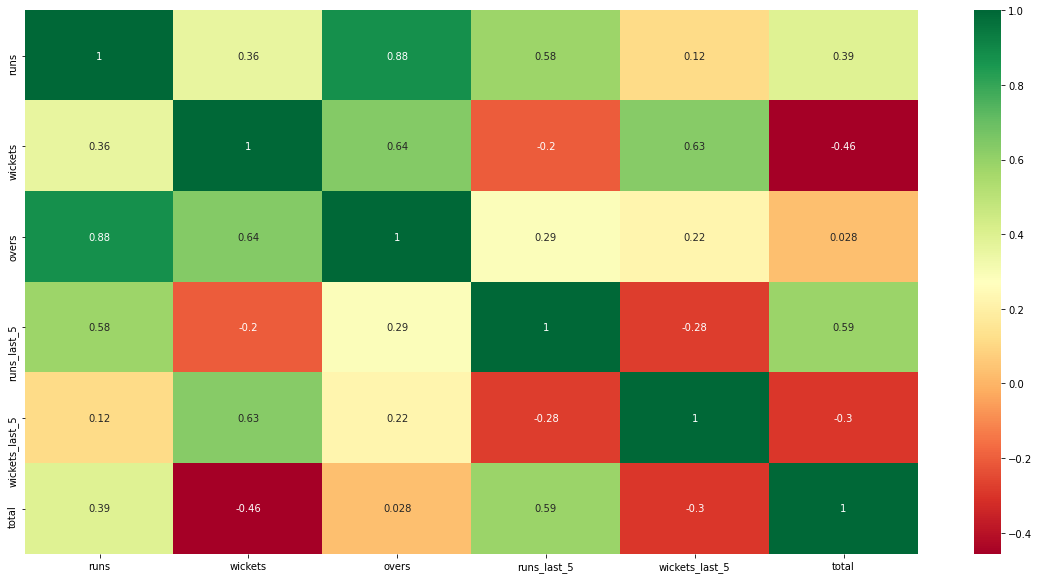

In [169]:
# Selecting features using the heatmap

corr_matrix = df.corr()
top_corr_features = corr_matrix.index

#plotting the heatmap
plt.figure(figsize=(20,10))
g = sns.heatmap(data=df[top_corr_features].corr(),annot=True,cmap='RdYlGn')

### Data Preprocessing
- Handling Categorical Features
- Splitting the dataset into Train and Test Data 

In [170]:
df1 = pd.get_dummies(data=df,columns = ['bat_team','bowl_team'])

In [172]:
df1.columns

Index(['date', 'runs', 'wickets', 'overs', 'runs_last_5', 'wickets_last_5',
       'total', 'bat_team_Chennai Super Kings', 'bat_team_Delhi Daredevils',
       'bat_team_Kings XI Punjab', 'bat_team_Kolkata Knight Riders',
       'bat_team_Mumbai Indians', 'bat_team_Rajasthan Royals',
       'bat_team_Royal Challengers Bangalore', 'bat_team_Sunrisers Hyderabad',
       'bowl_team_Chennai Super Kings', 'bowl_team_Delhi Daredevils',
       'bowl_team_Kings XI Punjab', 'bowl_team_Kolkata Knight Riders',
       'bowl_team_Mumbai Indians', 'bowl_team_Rajasthan Royals',
       'bowl_team_Royal Challengers Bangalore',
       'bowl_team_Sunrisers Hyderabad'],
      dtype='object')

In [173]:
df1.head()

,date,runs,wickets,overs,runs_last_5,wickets_last_5,total,bat_team_Chennai Super Kings,bat_team_Delhi Daredevils,bat_team_Kings XI Punjab,...,bat_team_Royal Challengers Bangalore,bat_team_Sunrisers Hyderabad,bowl_team_Chennai Super Kings,bowl_team_Delhi Daredevils,bowl_team_Kings XI Punjab,bowl_team_Kolkata Knight Riders,bowl_team_Mumbai Indians,bowl_team_Rajasthan Royals,bowl_team_Royal Challengers Bangalore,bowl_team_Sunrisers Hyderabad
32,2008-04-18,61,0,5.1,59,0,222,0,0,0,...,0,0,0,0,0,0,0,0,1,0
33,2008-04-18,61,1,5.2,59,1,222,0,0,0,...,0,0,0,0,0,0,0,0,1,0
34,2008-04-18,61,1,5.3,59,1,222,0,0,0,...,0,0,0,0,0,0,0,0,1,0
35,2008-04-18,61,1,5.4,59,1,222,0,0,0,...,0,0,0,0,0,0,0,0,1,0
36,2008-04-18,61,1,5.5,58,1,222,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [174]:
## Rearranging the columns
df1 = df1[['date', 'bat_team_Chennai Super Kings', 'bat_team_Delhi Daredevils', 'bat_team_Kings XI Punjab',
              'bat_team_Kolkata Knight Riders', 'bat_team_Mumbai Indians', 'bat_team_Rajasthan Royals',
              'bat_team_Royal Challengers Bangalore', 'bat_team_Sunrisers Hyderabad',
              'bowl_team_Chennai Super Kings', 'bowl_team_Delhi Daredevils', 'bowl_team_Kings XI Punjab',
              'bowl_team_Kolkata Knight Riders', 'bowl_team_Mumbai Indians', 'bowl_team_Rajasthan Royals',
              'bowl_team_Royal Challengers Bangalore', 'bowl_team_Sunrisers Hyderabad',
              'overs', 'runs', 'wickets', 'runs_last_5', 'wickets_last_5', 'total']]

In [175]:
df1.head()

,date,bat_team_Chennai Super Kings,bat_team_Delhi Daredevils,bat_team_Kings XI Punjab,bat_team_Kolkata Knight Riders,bat_team_Mumbai Indians,bat_team_Rajasthan Royals,bat_team_Royal Challengers Bangalore,bat_team_Sunrisers Hyderabad,bowl_team_Chennai Super Kings,...,bowl_team_Mumbai Indians,bowl_team_Rajasthan Royals,bowl_team_Royal Challengers Bangalore,bowl_team_Sunrisers Hyderabad,overs,runs,wickets,runs_last_5,wickets_last_5,total
32,2008-04-18,0,0,0,1,0,0,0,0,0,...,0,0,1,0,5.1,61,0,59,0,222
33,2008-04-18,0,0,0,1,0,0,0,0,0,...,0,0,1,0,5.2,61,1,59,1,222
34,2008-04-18,0,0,0,1,0,0,0,0,0,...,0,0,1,0,5.3,61,1,59,1,222
35,2008-04-18,0,0,0,1,0,0,0,0,0,...,0,0,1,0,5.4,61,1,59,1,222
36,2008-04-18,0,0,0,1,0,0,0,0,0,...,0,0,1,0,5.5,61,1,58,1,222


In [177]:
X_train = df1.drop(labels='total',axis=1)[df1['date'].dt.year <=2016]
X_test = df1.drop(labels='total',axis=1)[df1['date'].dt.year >=2017]

y_train = df1[df1['date'].dt.year <=2016]['total'].values
y_test = df1[df1['date'].dt.year >=2017]['total'].values

#Removing the date column
X_train.drop(labels='date',axis=1,inplace=True)
X_test.drop(labels='date',axis=1,inplace=True)

print("Training set: {} and Test set: {}".format(X_train.shape,X_test.shape))

Training set: (37330, 21) and Test set: (2778, 21)


### Model Buiilding

I will experiment with 4 different algorithms, they are as follows:
- Linear Regression
- Decision Tree Regression
- Random Forest Regression

----- Boosting Algorithm -----
- Adaptive Boosting (AdaBoost) Algorithm

### Linear Regression

In [199]:
# Linear Regression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [200]:
lr.get_params()

{'copy_X': True,
 'fit_intercept': True,
 'n_jobs': None,
 'normalize': False,
 'positive': False}

In [227]:
#Predicting results
lr_pred = lr.predict(X_test)
Accuracy = r2_score(y_test,lr_pred)
print(Accuracy)

0.7519522843004652


In [228]:
# Linear Regression -- Model Evaluation
from sklearn.metrics import mean_squared_error as mse, mean_absolute_error as mae, accuracy_score
from sklearn.metrics import mean_absolute_error as mae, mean_squared_error as mse, accuracy_score
print("---- Linear Regression - Model Evaluation ----")
print("Mean Absolute Error (MAE): {}".format(mae(y_test,lr_pred)))
print("Mean Squared Error (MSE): {}".format(mse(y_test, lr_pred)))
print("Root Mean Squared Error (RMSE): {}".format(np.sqrt(mse(y_test, lr_pred))))

---- Linear Regression - Model Evaluation ----
Mean Absolute Error (MAE): 12.122481519837788
Mean Squared Error (MSE): 251.32310304517708
Root Mean Squared Error (RMSE): 15.85317327998332


### Decision Tree Regressor

In [229]:
# Decision Tree Regressor
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor()
dt.fit(X_train,y_train)

DecisionTreeRegressor()

In [230]:
dt.get_params()

{'ccp_alpha': 0.0,
 'criterion': 'mse',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

In [231]:
## Predicting results
dt_pred = dt.predict(X_test)
Accuracy = r2_score(y_test,dt_pred)
print(Accuracy)

0.4648455141582313


In [232]:
#Decision Tree Regressor --- Model Evalution ----
print("Decision Tree Regressor -- Model Evaluation----")
print("Mean Absolute Error(MAE):{}".format(mae(y_test,dt_pred)))
print("Mean Squared Error(MSE):{}".format(mse(y_test,dt_pred)))
print("Root Mean Squared Error(RMSE): {}".format(np.sqrt(mse(y_test,dt_pred))))

Decision Tree Regressor -- Model Evaluation----
Mean Absolute Error(MAE):17.406047516198704
Mean Squared Error(MSE):542.2210223182145
Root Mean Squared Error(RMSE): 23.28563983055253


### Random Forest Regressor

In [233]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()
rf.fit(X_train,y_train)

RandomForestRegressor()

In [234]:
rf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'mse',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [235]:
#predicting the result
rf_pred = rf.predict(X_test)
Accuracy = r2_score(y_test,rf_pred)
print(Accuracy)

0.6731029736758254


In [236]:
## Random Forest Regressor --- Model Evaluation---
print("Random Forest Regressor -- Model Evaluation----")
print("Mean Absolute Error(MAE):{}".format(mae(y_test,rf_pred)))
print("Mean Squared Error(MSE):{}".format(mse(y_test,rf_pred)))
print("Root Mean Squared Error(RMSE): {}".format(np.sqrt(mse(y_test,rf_pred))))

Random Forest Regressor -- Model Evaluation----
Mean Absolute Error(MAE):13.754852754636772
Mean Squared Error(MSE):331.21359251520244
Root Mean Squared Error(RMSE): 18.199274505188452


*Note: Since Linear Regression model performs best as compared to other two, we use this model and boost it's performance using AdaBoost Algorithm*

### ADABoost Algorithm

In [248]:
from sklearn.ensemble import AdaBoostRegressor
adb = AdaBoostRegressor(base_estimator=lr,n_estimators=100)
adb.fit(X_train,y_train)

AdaBoostRegressor(base_estimator=LinearRegression(), n_estimators=100)

In [249]:
adb.get_params()

{'base_estimator__copy_X': True,
 'base_estimator__fit_intercept': True,
 'base_estimator__n_jobs': None,
 'base_estimator__normalize': False,
 'base_estimator__positive': False,
 'base_estimator': LinearRegression(),
 'learning_rate': 1.0,
 'loss': 'linear',
 'n_estimators': 100,
 'random_state': None}

In [250]:
#Predicting result
adb_pred = adb.predict(X_test)
Accuarcy = r2_score(y_test,adb_pred)
print(Accuracy)

0.6731029736758254


In [251]:
# AdaBoost Regression - Model Evaluation
print("---- AdaBoost Regression - Model Evaluation ----")
print("Mean Absolute Error (MAE): {}".format(mae(y_test, adb_pred)))
print("Mean Squared Error (MSE): {}".format(mse(y_test, adb_pred)))
print("Root Mean Squared Error (RMSE): {}".format(np.sqrt(mse(y_test, adb_pred))))

---- AdaBoost Regression - Model Evaluation ----
Mean Absolute Error (MAE): 12.086349937708109
Mean Squared Error (MSE): 245.05922538875632
Root Mean Squared Error (RMSE): 15.654367613824466


*Note: Using AdaBoost did not reduce the error to a significant level. Hence, we will you simple linear regression model for prediction*

### Predictions
- Model trained on the data from **IPL Seasons 1 to 9** ie: (2008 to 2016)
- Model tested on data from **IPL Season 10** ie: (2017)
- Model predicts on data from **IPL Seasons 11 to 12** ie: (2018 to 2019)

In [260]:
def predict_score(batting_team='Chennai Super Kings', bowling_team='Mumbai Indians', overs=5.1, runs=50, wickets=0, runs_in_prev_5=50, wickets_in_prev_5=0):
  temp_array = list()

  # Batting Team
  if batting_team == 'Chennai Super Kings':
    temp_array = temp_array + [1,0,0,0,0,0,0,0]
  elif batting_team == 'Delhi Daredevils':
    temp_array = temp_array + [0,1,0,0,0,0,0,0]
  elif batting_team == 'Kings XI Punjab':
    temp_array = temp_array + [0,0,1,0,0,0,0,0]
  elif batting_team == 'Kolkata Knight Riders':
    temp_array = temp_array + [0,0,0,1,0,0,0,0]
  elif batting_team == 'Mumbai Indians':
    temp_array = temp_array + [0,0,0,0,1,0,0,0]
  elif batting_team == 'Rajasthan Royals':
    temp_array = temp_array + [0,0,0,0,0,1,0,0]
  elif batting_team == 'Royal Challengers Bangalore':
    temp_array = temp_array + [0,0,0,0,0,0,1,0]
  elif batting_team == 'Sunrisers Hyderabad':
    temp_array = temp_array + [0,0,0,0,0,0,0,1]

  # Bowling Team
  if bowling_team == 'Chennai Super Kings':
    temp_array = temp_array + [1,0,0,0,0,0,0,0]
  elif bowling_team == 'Delhi Daredevils':
    temp_array = temp_array + [0,1,0,0,0,0,0,0]
  elif bowling_team == 'Kings XI Punjab':
    temp_array = temp_array + [0,0,1,0,0,0,0,0]
  elif bowling_team == 'Kolkata Knight Riders':
    temp_array = temp_array + [0,0,0,1,0,0,0,0]
  elif bowling_team == 'Mumbai Indians':
    temp_array = temp_array + [0,0,0,0,1,0,0,0]
  elif bowling_team == 'Rajasthan Royals':
    temp_array = temp_array + [0,0,0,0,0,1,0,0]
  elif bowling_team == 'Royal Challengers Bangalore':
    temp_array = temp_array + [0,0,0,0,0,0,1,0]
  elif bowling_team == 'Sunrisers Hyderabad':
    temp_array = temp_array + [0,0,0,0,0,0,0,1]

  # Overs, Runs, Wickets, Runs_in_prev_5, Wickets_in_prev_5
  temp_array = temp_array + [overs, runs, wickets, runs_in_prev_5, wickets_in_prev_5]

  # Converting into numpy array
  temp_array = np.array([temp_array])

  # Prediction
  return int(lr.predict(temp_array)[0])


### Prediction 1
- Date: 11th April 2019
- IPL : Season 12
- Match number: 25
- Teams: Rajasthan Royals vs. Chennai Super Kings
- First Innings final score: 151/7

In [261]:
final_score = predict_score(batting_team='Rajasthan Royals', bowling_team='Chennai Super Kings', overs=13.3, runs=92, wickets=5, runs_in_prev_5=27, wickets_in_prev_5=2)
print("The final predicted score (range): {} to {}".format(final_score-10, final_score+5))


The final predicted score (range): 128 to 143


### Prediction 2
- Date: 14th April 2019
- IPL : Season 12
- Match number: 30
- Teams: Sunrisers Hyderabad vs. Delhi Daredevils
- First Innings final score: 155/7

In [264]:
final_score = predict_score(batting_team='Delhi Daredevils',bowling_team ='Sunrisers Hyderabad',overs=11.5,runs=98,wickets=3,runs_in_prev_5=41,wickets_in_prev_5=1)
print("The final predicted score (range):{} to {}".format(final_score-10,final_score+5))

The final predicted score (range):157 to 172


### Prediction 3
- Date: 30th March 2019
- IPL : Season 12
- Match number: 9
- Teams: Mumbai Indians vs. Kings XI Punjab
- First Innings final score: 176/7

In [266]:
final_score = predict_score(batting_team='Mumbai Indians', bowling_team='Kings XI Punjab', overs=12.3, runs=113, wickets=2, runs_in_prev_5=55, wickets_in_prev_5=0)
print("The final predicted score (range): {} to {}".format(final_score-10, final_score+5))

The final predicted score (range): 180 to 195
